In [18]:
# import all the neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# This code block is to create a randomly assigned dataset with 2 features and the below parameters
# In doing so, we can simply use this dataset repeadetly for testing different scenarios
# Instead of having to create, download, and upload a new dataset every time, we simply change the parameters

# Define parameters
num_samples = 300
num_features = 2
decision_boundary = [1, -1]  # Coefficients of the linear decision boundary (e.g., y = x)

# Generate random points
X = np.random.rand(num_samples, num_features) * 10  # Generate random feature values
y = np.where(X.dot(decision_boundary) > 0, 1, 0)  # Assign labels based on decision boundary

# Combine features and labels
data = np.hstack((X, y.reshape(-1, 1)))

# save data into an np array
data = np.array(data)

# normalize the data using min/max method
x1_pre = (data[:, 0])
x2_pre = (data[:, 1])

y = (data[:, 2])

x1 = (x1_pre - np.min(x1_pre)) / (np.max(x1_pre) - np.min(x1_pre))
x2 = (x2_pre - np.min(x2_pre)) / (np.max(x2_pre) - np.min(x2_pre))

In [20]:
# defining the percepeton class and all of of its neccesary functions
class Percepton:
  w = []

  def __init__(self, k):
    self.k = k
    self.w = []

  # initialize the weights
  def create_w(self):
    self.w = [-2, 1]
    return self.w

  def make_x_list(self, x, x_list):
      x_list.clear()  # Clear x_list before populating
      for i in range(self.k + 1):
          x_list.append((x) ** i)
      return x_list

  def der(self, wi, x, y, s, i):
    # chooses which derivation to use depending on the given side to know wether to go + or -
      if s == 1:
        num = (-1 * (2 * ((wi * x) - y) * (x ** i)))
      else:
        num = (1 * (2 * ((wi * x) - y) * (x ** i)))
      return num

  def update(self, xi, yi, s, x1, learning_rate):
      for i in range(self.k + 1):
          gradient = self.der(self.w[i], xi, yi, s, i)
          self.w[i] = self.w[i] - (learning_rate * gradient / len(x1))
      return self.w

  def forward(self):
    return self.w

In [ ]:
# initialize and set neccesary variables

k = 1 # Set the value of k directly
learning_rate = .001 # Updated learning rate
w = []
x_list1 = []

# make an object of the Percepton class
perc = Percepton(k)

# create weights
w = perc.create_w()

# run through the code for designated amount of epochs
epoch = 0
while epoch < 500:
    loss = 0  # Reset loss for each epoch
    error = 0
    plugged_in = 0

    for i in range(len(x1)):
        error = 0
        plugged_in = 0
        x_list1 = perc.make_x_list(x1[i], x_list1)

        for j in range(k+1):
            plugged_in += (x_list1[j] * w[j])

        error = plugged_in - y[i]  # Calculate the error as the difference between predicted and actual output
        loss += (error ** 2)  # Accumulate the squared error

    loss /= len(x1)


    for i in range(len(x1)):
        x_list1 = perc.make_x_list(x1[i], x_list1)
        w = perc.update(x1[i], x2[i], plugged_in, x1, learning_rate)

    epoch += 1

    # print the epoch, loss, coefficients every epoch
    print("Epoch: ", epoch)
    print("Loss:", loss)
    print("Coefficients:", w)
    print("----------------------------")

# print the final coefficients and loss
print("Final coefficients:", w)
print("Final loss:", loss)

# result of epochs hidden for space otimization

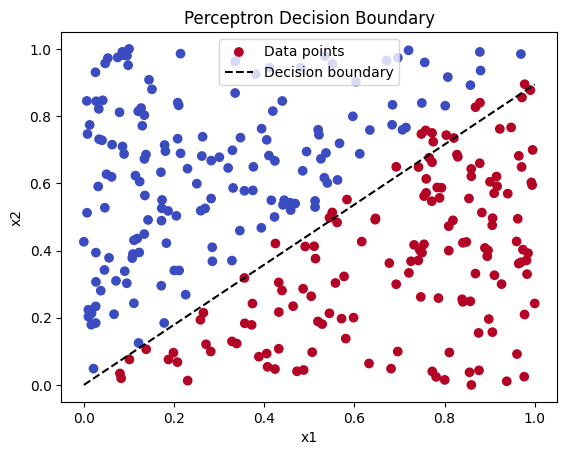

In [23]:
# Plot dataset points
plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm, label='Data points')

# Plot decision boundary (assuming k=1, linear decision boundary)
x_decision = np.linspace(0, 1, 100)
y_decision = (-w[0] * x_decision) / w[1]  # Assuming k=1, w[0] is for x1, w[1] is for x2, w[2] is bias
plt.plot(x_decision, y_decision, "k--", label='Decision boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()